## Linear Algebra (CpE210A)
### Laboratory 2: Plotting Vectors using NumPy and MatPlotLib
Coded and submitted by:

**Liwag, Martin Phillips E.**

**58010**

**Lab Exercises:**


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

### Part 1: Skyline Eagle Fly
You are tasked to make a tracking device for Philippine Eagles at the Philippine Eagle Center at Davao. The tracker sensors only give the longitudinal and latitudinal distance (meters) of the eagle's position relative to their nests which we will treat as the origin of the tracking view. We want to determine the relative displacement of the eagle from its nest. It is expected that the eagles will change exactly two times, it can then be assumed that the program will show three displacements. Please make a prototype code using the additional information given below:


\begin{align*}(Eq.1) dist_{total} = (long_{total})\hat{x} + (long_{total})\hat{y}\\ 
              (Eq.2) disp = \sqrt{distx^{2} + disty^{2}}\\ 
  (Eq.3)^{θ} = arctan \frac{y}{ax}\end{align*}

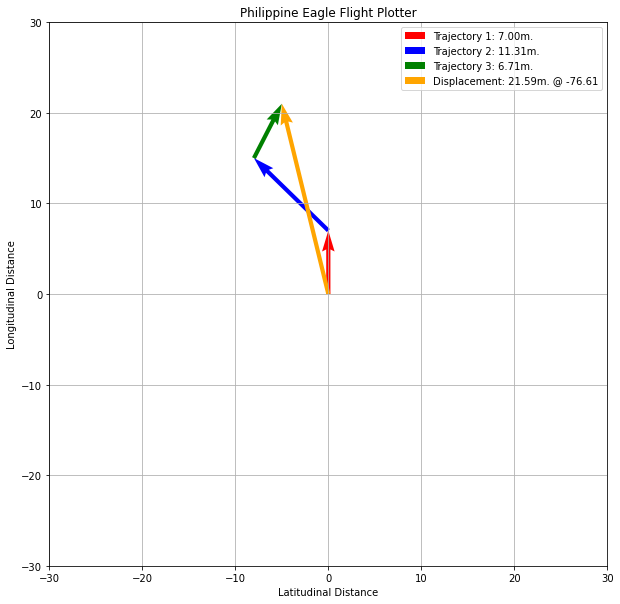

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
def track_eagle(make_figs=True):
    long = np.random.randint(-10,10, size=3) 
    lat = np.random.randint(-10,10, size=3)  
                                              
                                             

    dist1 = np.array([long[0],lat[0]])                             
    dist2 = np.array([long[1],lat[1]])
    dist3 = np.array([long[2],lat[2]])

    dist_total = dist_total = [dist1[0] + dist2[0] + dist3[0], dist1[1] + dist2[1] + dist3[1]]                        
    
    disp = np.sqrt((dist_total[0]**2)+(dist_total[1]**2))                             
    alpha = 10**-6
    theta = np.arctan((dist_total[1])/(dist_total[0] + alpha))                            
    theta = np.degrees(theta)                
    
    
    plt.figure(figsize=(10,10))
    plt.title('Philippine Eagle Flight Plotter')
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.xlabel('Latitudinal Distance')
    plt.ylabel('Longitudinal Distance')
    plt.grid()
    n = 2
    
   
    
    plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
    plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
               angles='xy', scale_units='xy',scale=1, color='blue',
              label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
    plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
               dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='green',
              label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
    plt.quiver(0,0, dist_total[0], dist_total[1], 
               angles='xy', scale_units='xy',scale=1, color='orange',
              label='Displacement: {:.2f}m. @ {:.2f}'.format(disp, theta))
    
    plt.legend()
    
    if make_figs:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(disp)}@{int(theta)}.png', dpi=300)
    
    plt.show()
    
track_eagle(make_figs=True)

### Part 2: Reverse Engineering
Your project manager found out that the previous engineer that handled the project did some sort of algorithm regarding the eagles. He gave you the piece code for you to analyze and required you to make a documentation out of it. The code is given below.

\begin{align*} v_t = [(velocity \times time)]\\  
s_t = [(speed \times time)]\\
a_t = [(acceleration \times time)] \end{align*}

In [28]:
def eagle_kinematics(speed, time):   #calling the variable to mark as function header
    req_shape = 4  #the variable is equal to 4                        
    velocity = np.zeros((req_shape-1,))   #the value of velocity in zeroes are minus 1 to the req_shape. It becomes [0,0,0]
    acceleration = np.zeros((req_shape-2,))##the values of aceleration in zeroes are minus 2 to the req_shape.It becomes [0,0]
    total_vector = np.array([t**3, t**2, t, 1])#the value of total vector is multiplied in the given element.[8,4,2,1]
    if speed.shape == (req_shape,):   #if statement, must be equal to req_shape identifier
        velocity = np.array([3*speed[0],2*speed[1], speed[2]])#each of the element in array of velocity will be
                                                                                              # multiplied in the given [6,2,3]
        acceleration = np.array([2*velocity[0],velocity[1]])   #the elements in array of velocity will be multiply [12.2]
        speed_total = np.sum(np.multiply(speed, total_vector))  #28 is the answer
        velocity_total = np.sum(np.multiply(velocity, total_vector[1:]))   #31 is the anwer
        acceleration_total = np.sum(np.multiply(acceleration, total_vector[2:]))  #26 is the answer
        
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({req_shape},)')  
      
    return speed_total, velocity_total, acceleration_total

In [29]:
x = np.array([2,1,3,2])
t = 2
eagle_kinematics(x, t)

(28, 31, 26)

### Part 3: Bebang's Online Business
You have a friend named Bebang who has an online business in which she sells donuts. She asks you to make something that helps her to observe the increase and decrease of her profit considering the reach of her online posts. As novice data analytic engineers, you suggest to make a plotter using vectors of her weekly profit and FB post reach for a month. She is amazed that you have this idea and will pay you 15,000 PHP for the program. Thus you venture in implementing your idea with the PH Eagle Tracker as the base code.

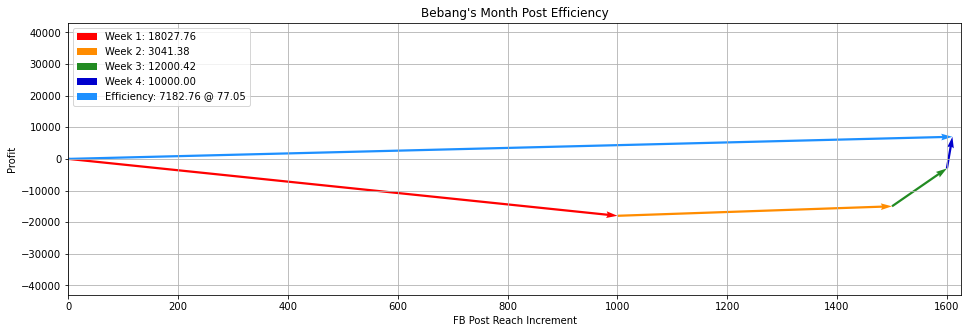

In [32]:
def month_profit_trace(profit, reach, make_figs=True): 
    if (profit.shape == (4,)) and (reach.shape == (4,)):         #disintegrate the 1 month into 4 weeks
        week1 = np.array((reach[0], profit[0]))       
        week2 = np.array((reach[1], profit[1]))
        week3 = np.array((reach[2], profit[2]))
        week4 = np.array((reach[3], profit[3]))
        
        week_total = [week1[0] + week2[0] + week3[0] + week4[0],  week1[1] + week2[1] + week3[1] + week4[1]]     
        week_performance = np.sqrt((week_total[0]**2)+(week_total[1]**2))          # i'm using np.sqrt() function again
        alpha = 10**-6
        reach_gradient = np.arctan((week_total[1])/(week_total[0] + alpha))
        reach_gradient = np.degrees(reach_gradient)

        plt.figure(figsize=(16,5))                                                   #the area of the graph
        plt.title('Bebang\'s Month Post Efficiency')                                 #title itself
        plt.xlim(0,1.01*np.sum(reach))
        plt.ylim(-np.sum(np.abs(profit)),np.sum(np.abs(profit)))            
        plt.xlabel('FB Post Reach Increment')                                        #label
        plt.ylabel('Profit')                                                         #label
        plt.grid()                                                                   #converting into grid
        n = 2
        
        plt.quiver(0,0, week1[0], week1[1],                                           #week 1 variables
                   angles='xy', scale_units='xy',scale=1, color='red', width=0.0025,
                   label='Week 1: {:.2f}'.format(np.linalg.norm(week1)))
        plt.quiver(week1[0], week1[1], week2[0], week2[1],                            #week2 variables
                   angles='xy', scale_units='xy',scale=1, color='darkorange', width=0.0025,
                   label='Week 2: {:.2f}'.format(np.linalg.norm(week2)))
        plt.quiver(np.add(week1[0], week2[0]), np.add(week1[1], week2[1]),                    #week 3 variables
                   week3[0], week3[1], angles='xy', scale_units='xy',scale=1, color='forestgreen', width=0.0025,
                   label='Week 3: {:.2f}'.format(np.linalg.norm(week3)))
        plt.quiver((week1[0] + week2[0]+ week3[0]), (week1[1] + week2[1]+ week3[1]),   #week 4
                   week4[0], week4[1], angles='xy', scale_units='xy',scale=1, color='mediumblue', width=0.0025,
                    label='Week 4: {:.2f}'.format(np.linalg.norm(week4)))
        plt.quiver(0,0, week_total[0], week_total[1], angles='xy', scale_units='xy',scale=1, color='dodgerblue', width=0.0025,
                  label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance, reach_gradient)) #total displacement variables

        plt.legend(loc='upper left') #the location of the legend

        if make_figs:  #decision statement
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(week_performance)}@{int(reach_gradient)}.png', dpi=300)

        plt.show()
    
    else:             #decision statement if no values
        print('Monthly Efficiency Undeterminate.') 
        
profit= np.array([-18000, 3000, 12000, 10000])    ## [-18000, 3000, 12000, 10000]
reach = np.array([1000, 500, 100, 10])             ## [1000, 500, 100, 10]

month_profit_trace(profit, reach, make_figs=False) 